In [1]:
from utils1 import *

In [3]:
# Load the MNIST dataset

trainset = datasets.MNIST(
    "./MNIST_data/", download=True, train=True, transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:10<00:00, 931912.26it/s]


Extracting ./MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 780568.81it/s]

Extracting ./MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST\raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 863241.74it/s]


Extracting ./MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4545580.71it/s]

Extracting ./MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST\raw



In [7]:
# Split the training dataset into 3 datasets
total_length = len(trainset)
split_size = total_length // 3
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

In [9]:
# Dataset preparation
part1 = exclude_digits(part1, excluded_digits=[1, 3, 7])
part2 = exclude_digits(part2, excluded_digits=[2, 5, 8])
part3 = exclude_digits(part3, excluded_digits=[4, 6, 9])

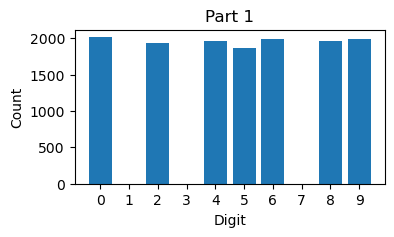

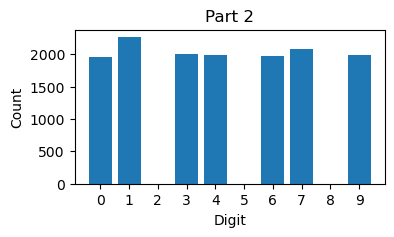

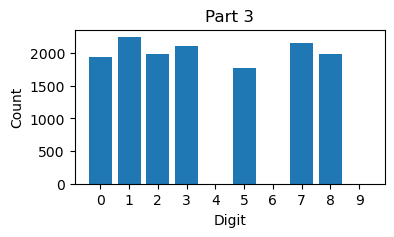

In [11]:
# Plot the 3 datasets
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

In [13]:
# Define the models 
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.5065381994774175
Epoch 2: Loss = 0.24500493310218632
Epoch 3: Loss = 0.19132230200393255
Epoch 4: Loss = 0.15808402133542437
Epoch 5: Loss = 0.13171681760008944
Epoch 6: Loss = 0.11005786310361568
Epoch 7: Loss = 0.09560647728138191
Epoch 8: Loss = 0.08431709011973337
Epoch 9: Loss = 0.0709400407233557
Epoch 10: Loss = 0.061375730086204616
Training complete
Epoch 1: Loss = 0.3983497699456556
Epoch 2: Loss = 0.18235595935090845
Epoch 3: Loss = 0.1642766245308199
Epoch 4: Loss = 0.13469188889056177
Epoch 5: Loss = 0.1209621119030219
Epoch 6: Loss = 0.09922834471633125
Epoch 7: Loss = 0.09154476946735356
Epoch 8: Loss = 0.0809677930280616
Epoch 9: Loss = 0.07251403611319672
Epoch 10: Loss = 0.06491987831291876
Training complete
Epoch 1: Loss = 0.5017053573853798
Epoch 2: Loss = 0.2649856615509536
Epoch 3: Loss = 0.20764534479124588
Epoch 4: Loss = 0.16485751599811757
Epoch 5: Loss = 0.13950552492662593
Epoch 6: Loss = 0.12051728955126023
Epoch 7: Loss = 0.100858678269359

In [15]:
# Load the test dataset
testset = datasets.MNIST(
    "./MNIST_data/", download=True, train=False, transform=transform
)

In [17]:
# Dataset preparation 
testset_137 = include_digits(testset, included_digits=[1, 3, 7])
testset_258 = include_digits(testset, included_digits=[2, 5, 8])
testset_469 = include_digits(testset, included_digits=[4, 6, 9])

In [19]:
# Evaluate the models with test datasets
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, testset_137)
print(
    f"Model 1-> Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy1_on_137:.4f}"
)

_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, testset_258)
print(
    f"Model 2-> Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy2_on_258:.4f}"
)

_, accuracy3 = evaluate_model(model3, testset)
_, accuracy3_on_469 = evaluate_model(model3, testset_469)
print(
    f"Model 3-> Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy3_on_469:.4f}"
)

Model 1-> Test Accuracy on all digits: 0.6570, Test Accuracy on [1,3,7]: 0.0000
Model 2-> Test Accuracy on all digits: 0.6872, Test Accuracy on [2,5,8]: 0.0000
Model 3-> Test Accuracy on all digits: 0.6848, Test Accuracy on [4,6,9]: 0.0000


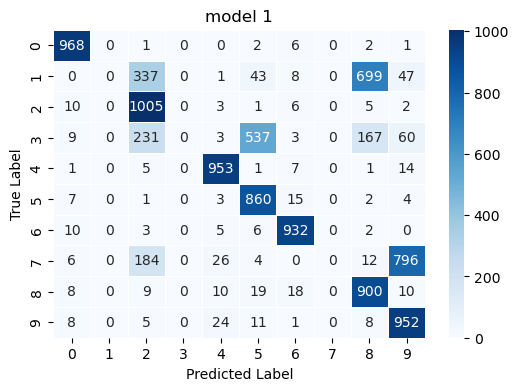

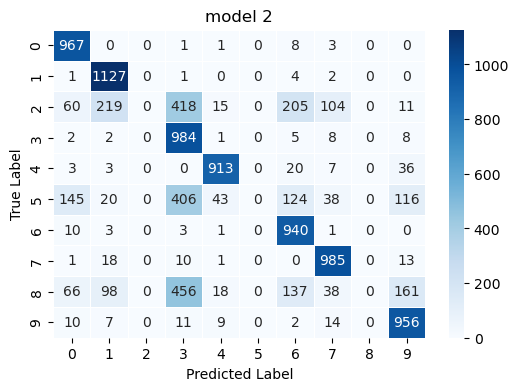

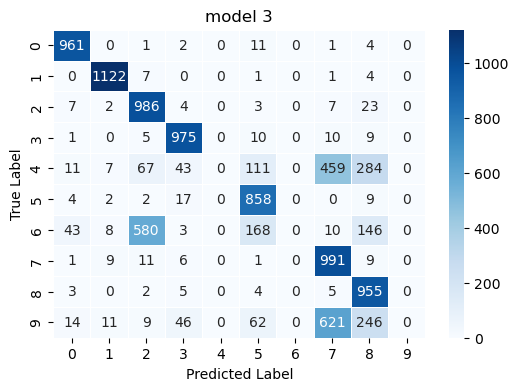

In [21]:
# Analyze the results 
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)

plot_confusion_matrix(confusion_matrix_model1_all, "model 1")
plot_confusion_matrix(confusion_matrix_model2_all, "model 2")
plot_confusion_matrix(confusion_matrix_model3_all, "model 3")